In [1]:
%matplotlib inline
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import urllib
from itertools import repeat
from matplotlib.pyplot import *
import re

In [2]:
def extract_data(list_of_files_paths):
    """
    This function receives a list of paths of files I want to extract and to present together,
    and it returns a list of datafeames for these paths.
    """
    list_of_dfs=[]
    for path in list_of_files_paths:
        try:
            raw_data=np.loadtxt(path)
            if np.isfinite(raw_data).all().all():
                list_of_dfs.append(raw_data)
            else:
                print('not all the values are finite in file:', path)  
        except:
            print('problem with extracting :', path)
    return list_of_dfs

list_of_paths=['D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/230815/Before1_230815.txt']                   
list_of_nps=extract_data(list_of_paths)
assert isinstance(list_of_nps,list)

In [3]:
print(list_of_nps[0].shape)

(6000, 20)


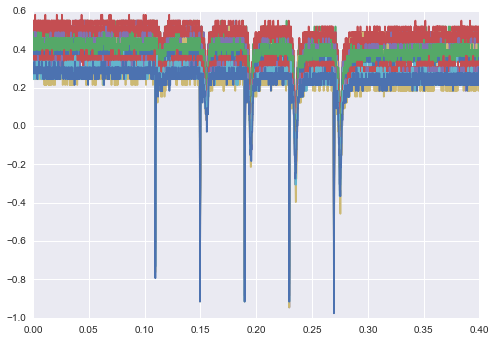

In [4]:
plt.plot(list_of_nps[0][:4000,0], list_of_nps[0][:4000,1:]);

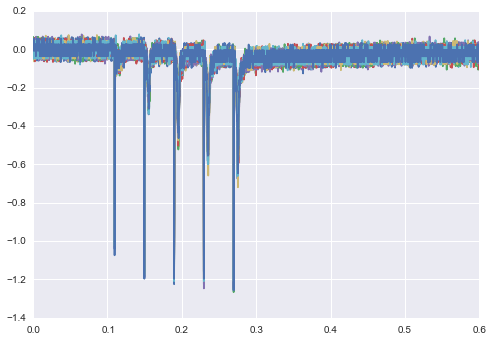

In [5]:
def same_baseline(nps_list, baseline=1000):
    """
    these function takes a list of numpy_arrays that hold the data of 5_pulse stimulations 
    and set them to have the same baseline.
    """
    for numpy_array in nps_list:
        baseline_matrix=numpy_array[:baseline,1:]
        baseline_mean=np.mean(baseline_matrix, axis=0)
        #print(baseline_matrix.shape, baseline_mean.shape)
        numpy_array[:,1:]=numpy_array[:,1:]-baseline_mean
   
    return nps_list
        
list_of_nps_new=same_baseline(list_of_nps)
plt.plot(list_of_nps_new[0][:,0], list_of_nps_new[0][:,1:]);        
    

In [6]:
"""
a = np.array([[1, 2], [3, 4]])
print(a, end='\n \n') 
print(np.mean(a), 'returns the mean of the flattened array which means for all the values pooled')
print(np.mean(a, axis=0), 'returns the mean column-wise')
print(np.mean(a, axis=1), 'returns the mean row-wise')
print(a[0,:])
"""

"\na = np.array([[1, 2], [3, 4]])\nprint(a, end='\n \n') \nprint(np.mean(a), 'returns the mean of the flattened array which means for all the values pooled')\nprint(np.mean(a, axis=0), 'returns the mean column-wise')\nprint(np.mean(a, axis=1), 'returns the mean row-wise')\nprint(a[0,:])\n"

In [7]:
# Hello world...

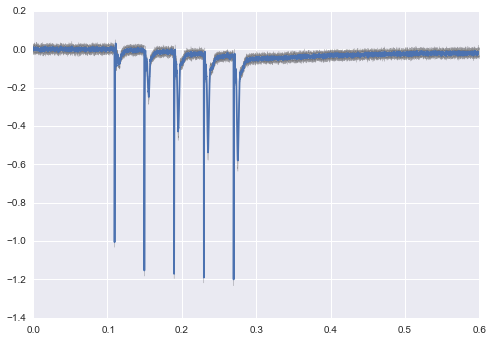

In [8]:
def find_average(nps_list):
    """
    these function takes a list of numpy_arrays that hold the data of 5_pulse stimulations 
    and finds there average.
    """
    list_of_averages=[]
    list_of_stds=[]
    for numpy_array in nps_list:
        list_of_averages.append(np.mean(numpy_array[:,1:], axis=1))
        list_of_stds.append(np.std(numpy_array[:,1:], axis=1))
    return list_of_averages, list_of_stds
        
list_of_averages, list_of_stds=find_average(list_of_nps_new)
plt.plot(list_of_nps[0][:,0], list_of_averages[0])
plt.fill_between(list_of_nps[0][:,0], list_of_averages[0]+list_of_stds[0], list_of_averages[0]-list_of_stds[0], color='k', alpha=0.3)
    

In [9]:
def find_amplitudes(list_of_averages):
    """
    this function the averages and find the amplitude of the responses
    """
    list_of_amplitudes=[(list_of_averages[1109:1493]).max() , list_of_averages[1509:1893].max(), list_of_averages[1909:2293].max(), list_of_averages[2309:2693].max(), list_of_averages[2709:3093].max()]
    list_of_locations=[(list_of_averages[1109:1493]).argmax() , list_of_averages[1509:1893].argmax(), list_of_averages[1909:2293].argmax(), list_of_averages[2309:2693].argmax(), list_of_averages[2709:3093].argmax()]
    return list_of_amplitudes,list_of_locations 

list_of_amplitudes1,list_of_locations1= find_amplitudes(list_of_averages[0])
    
    

In [42]:
def find_amplitudes_paired_pulse(list_of_averages):
    """
    this function the averages and find the amplitude of the responses
    """
    list_of_amplitudes=[(list_of_averages[570:650]).max() , list_of_averages[965:1050].max()]
    list_of_locations=[(list_of_averages[570:650]).argmax() , list_of_averages[965:1050].argmax()]
    return list_of_amplitudes,list_of_locations 

list_of_amplitudes1,list_of_locations1= find_amplitudes(list_of_averages[0])
    
    

In [11]:
def compare_two(path1, path2):
    list_of_nps=extract_data([path1, path2])
    list_of_nps_new=same_baseline(list_of_nps)
    list_of_averages, list_of_stds=find_average(list_of_nps_new)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
    list_of_averages= [x * -1 for x in list_of_averages]
    ax[0].plot(list_of_nps_new[0][:,0], list_of_averages[1], color='g')
    ax[1].plot(list_of_nps_new[0][:,0], list_of_averages[0])
    list_of_amplitudes1,list_of_locations1= find_amplitudes(list_of_averages[0])
    list_of_amplitudes2,list_of_locations2= find_amplitudes(list_of_averages[1])
    ax[2].plot([1,2,3,4,5], list_of_amplitudes1,'-^', label='after')
    ax[2].plot([1,2,3,4,5], list_of_amplitudes2, '-o', label= 'before')
    plt.legend(loc=2)
    
    
    
    
#compare_two('C:/Users/meish123/Documents/recordings/Meishar/190815/atf_after1.txt' , 'C:/Users/meish123/Documents/recordings/Meishar/190815/atf3.txt')

problem with extracting : C:/Users/meish123/Documents/recordings/Meishar/190815/before1_txt.txt
problem with extracting : C:/Users/meish123/Documents/recordings/Meishar/190815/after2_txt.txt


IndexError: list index out of range

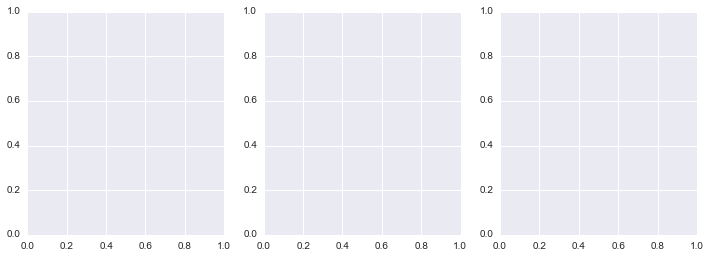

In [12]:
compare_two('C:/Users/meish123/Documents/recordings/Meishar/190815/before1_txt.txt' , 'C:/Users/meish123/Documents/recordings/Meishar/190815/after2_txt.txt')

(6000, 20) (6000, 20)


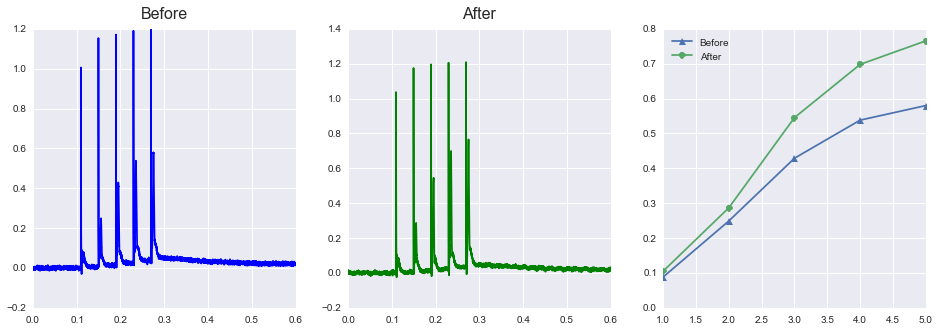

In [13]:
def compare_two2(path1, path2):
    list_of_nps=extract_data([path1, path2])
    list_of_nps[1]=list_of_nps[1][:,61:] # take only the last 20 responses
    print(list_of_nps[0].shape, list_of_nps[1].shape)
    list_of_nps_new=same_baseline(list_of_nps)
    list_of_averages, list_of_stds=find_average(list_of_nps_new)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
    list_of_averages= [x * -1 for x in list_of_averages]
    ax[0].plot(list_of_nps_new[0][:,0], list_of_averages[0], color='b')
    ax[0].set_title('Before', fontsize=16, y=1.02)
    ax[1].plot(list_of_nps_new[0][:,0], list_of_averages[1], color='g')
    ax[1].set_title('After', fontsize=16, y=1.02)
    list_of_amplitudes1,list_of_locations1= find_amplitudes(list_of_averages[0])
    list_of_amplitudes2,list_of_locations2= find_amplitudes(list_of_averages[1])
    ax[2].plot([1,2,3,4,5], list_of_amplitudes1,'-^', label='Before')
    ax[2].plot([1,2,3,4,5], list_of_amplitudes2, '-o', label= 'After')
    plt.legend(loc=2)
    
compare_two2('D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/230815/Before1_230815.txt', 'D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/230815/After1_230815.txt')
    

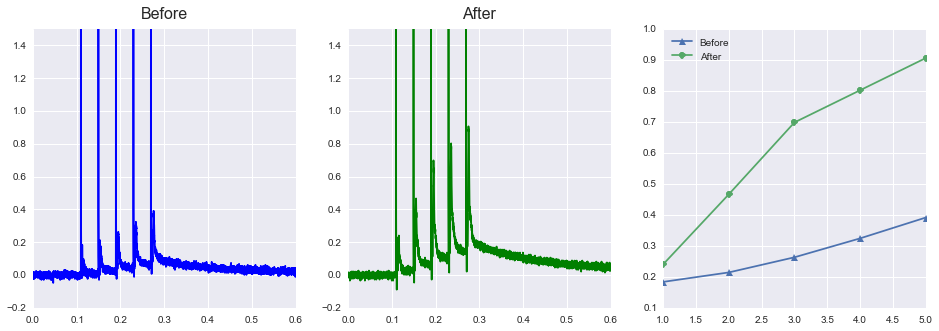

In [14]:
def compare_two3(path1, path2):
    list_of_nps=extract_data([path1, path2])
    #print(list_of_nps[0].shape, list_of_nps[1].shape, 'second:', list_of_nps[1])
    list_of_nps_new=same_baseline(list_of_nps)
    list_of_averages, list_of_stds=find_average(list_of_nps_new)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
    list_of_averages= [x * -1 for x in list_of_averages]
    ax[0].plot(list_of_nps_new[0][:,0], list_of_averages[0], color='b')
    ax[0].set_title('Before', fontsize=16, y=1.02)
    ax[1].plot(list_of_nps_new[0][:,0], list_of_averages[1], color='g')
    ax[1].set_title('After', fontsize=16, y=1.02)
    ax[0].set_ylim(-0.2,1.5)
    ax[1].set_ylim(-0.2,1.5)
    list_of_amplitudes1,list_of_locations1= find_amplitudes(list_of_averages[0])
    list_of_amplitudes2,list_of_locations2= find_amplitudes(list_of_averages[1])
    ax[2].plot([1,2,3,4,5], list_of_amplitudes1,'-^', label='Before')
    ax[2].plot([1,2,3,4,5], list_of_amplitudes2, '-o', label= 'After')
    plt.legend(loc=2)
    
compare_two3('D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/250815/Before2.txt', 'D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/250815/After2.txt')
    

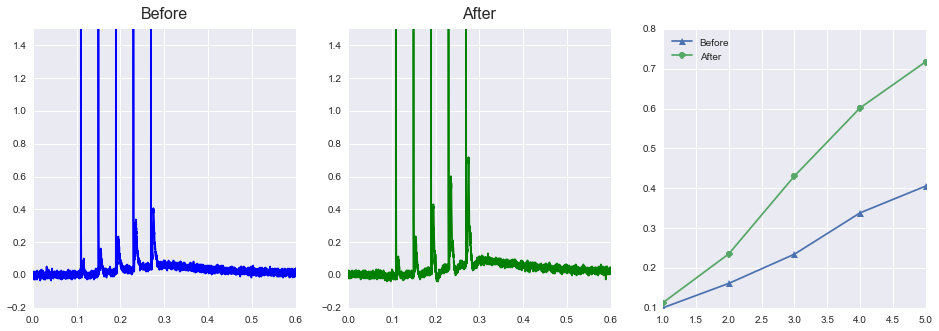

In [16]:
compare_two3('D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/260815/5p_before.txt', 'D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/260815/5p_after.txt')

(2000, 31) (2000, 11)


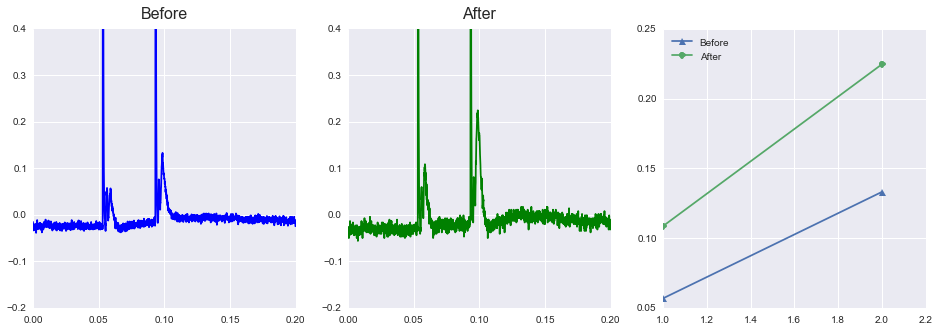

In [49]:
def compare_two4(path1, path2):
    """
    good for comparing two paired_pulse measurements one short before LTP and one long after LTP.
    """
    list_of_nps=extract_data([path1, path2])
    list_of_nps[1]=list_of_nps[1][:,80:]
    print(list_of_nps[0].shape, list_of_nps[1].shape)
    list_of_nps_new=same_baseline(list_of_nps)
    list_of_averages, list_of_stds=find_average(list_of_nps_new)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
    list_of_averages= [x * -1 for x in list_of_averages]
    ax[0].plot(list_of_nps_new[0][:,0], list_of_averages[0], color='b')
    ax[0].set_title('Before', fontsize=16, y=1.02)
    ax[1].plot(list_of_nps_new[0][:,0], list_of_averages[1], color='g')
    ax[1].set_title('After', fontsize=16, y=1.02)
    ax[0].set_ylim(-0.2,0.4)
    ax[1].set_ylim(-0.2,0.4)
    list_of_amplitudes1,list_of_locations1= find_amplitudes_paired_pulse(list_of_averages[0])
    list_of_amplitudes2,list_of_locations2= find_amplitudes_paired_pulse(list_of_averages[1])
    ax[2].plot([1,2], list_of_amplitudes1,'-^', label='Before')
    ax[2].plot([1,2], list_of_amplitudes2, '-o', label= 'After')
    plt.legend(loc=2)
    
compare_two4('D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/260815/2p_before.txt', 'D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/260815/2p_after.txt');

(-0.5, 0.1)

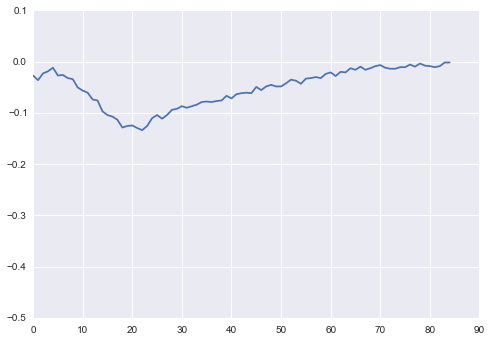

In [41]:
np_arrays=extract_data(['D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/260815/2p_before.txt'])
np_arrays=same_baseline(np_arrays)
my_average,my_std=find_average(np_arrays)
plt.plot(my_average[0][965:1050])  #570-650 amplitude1,  965-1050 amplitude2
plt.ylim(-0.5,0.1)
